## 决策树
### 决策树训练和可视化

In [8]:
from sklearn import tree
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target  

tree_clf = tree.DecisionTreeClassifier(criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

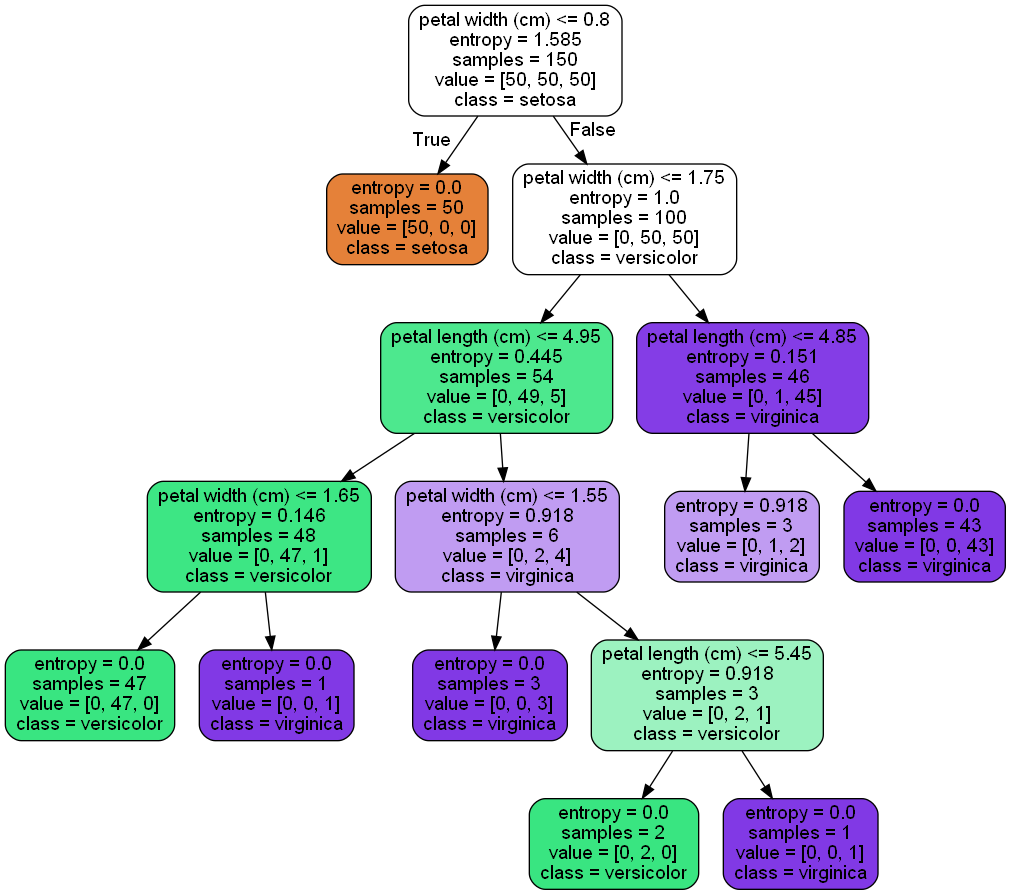

In [9]:
# 导出可视化文件
from sklearn.tree import export_graphviz
#import os
#import graphviz
import pydotplus 
from IPython.display import Image 

export_graphviz(tree_clf, out_file="iris_tree2.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)

# with open("iris_tree.dot") as f:
#     dot_graph=f.read()
    
#graphviz.Source(dot_graph)
pydot_graph = pydotplus.graph_from_dot_file("iris_tree2.dot") 
Image(pydot_graph.create_png())


### 决策树ID3
提示词：基于scikit-learn库模拟ID3

在 `scikit-learn` 中并没有直接实现 ID3 算法，但可以通过设置决策树的一些参数来模拟类似 ID3 的行为。

**一、ID3 算法简介**

ID3（Iterative Dichotomiser 3）算法是一种经典的决策树算法，它以信息增益为特征选择的标准来构建决策树。具体步骤如下：
1. 计算每个特征的信息增益。信息增益是指在划分数据之前和之后，信息熵的减少量。信息熵用来衡量数据的混乱程度，信息熵越小，数据的纯度越高。
2. 选择信息增益最大的特征作为当前节点的划分特征。
3. 对划分后的每个子节点，重复上述步骤，直到满足停止条件（如所有样本属于同一类别、没有更多特征可供选择等）。

**二、在 `scikit-learn` 中模拟 ID3**

虽然 `scikit-learn` 没有专门的 ID3 实现，但可以通过以下方式近似模拟：
1. 设置决策树的 `criterion='entropy'`，这使得决策树在选择划分特征时使用信息熵作为标准，与 ID3 类似。
2. 不设置 `max_depth` 等限制树深度的参数，让决策树尽可能地生长，类似于 ID3 不断进行特征划分直到满足停止条件。

以下是一个示例代码：

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树模型，模拟 ID3
id3_model = DecisionTreeClassifier(criterion='entropy')
id3_model.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(10, 8))
tree.plot_tree(id3_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

```

**三、局限性和注意事项**

1. 并非真正的 ID3
   - `scikit-learn` 中的决策树算法虽然可以通过设置参数模拟 ID3 的部分行为，但并不是完全等同于传统的 ID3 算法。在实际应用中，可能会有一些差异。
2. 过拟合风险
   - 像 ID3 这样不断以信息增益为标准进行划分，容易导致决策树过拟合训练数据。因此，在使用时需要注意适当调整参数，如设置 `max_depth`、`min_samples_split`、`min_samples_leaf` 等，以控制决策树的复杂度，防止过拟合。

总的来说，在 `scikit-learn` 中可以通过特定的参数设置来近似实现 ID3 算法的效果，但在使用时需要根据具体情况进行调整和优化，以获得更好的性能。


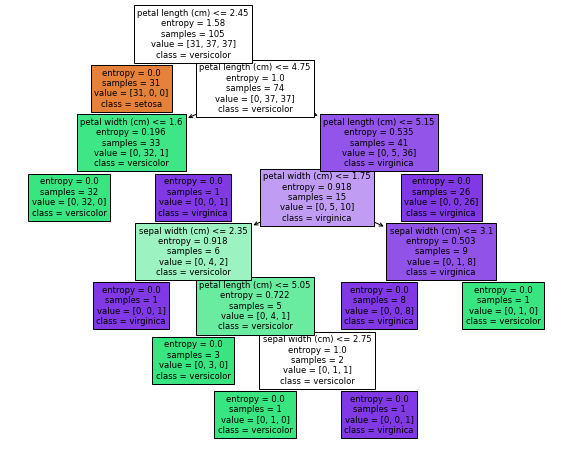

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树模型，模拟 ID3
id3_model = DecisionTreeClassifier(criterion='entropy')
id3_model.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(10, 8))
tree.plot_tree(id3_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

### 决策树C4.5

在 `scikit-learn` 中没有直接实现 C4.5 算法，但可以通过设置一些参数来近似模拟其行为。

提示词：基于scikit-learn库模拟C4.5

**一、C4.5 算法简介**

C4.5 算法是在 ID3 算法的基础上进行改进的决策树算法。主要改进点包括：
1. 采用信息增益率（Gain Ratio）作为特征选择的标准，克服了 ID3 算法偏向于选择取值较多特征的问题。信息增益率考虑了信息增益和分裂信息（Split Information），对取值较多的特征进行惩罚。
2. 能够处理连续型特征，通过对连续特征进行离散化处理，将其转化为多个区间进行划分。
3. 进行后剪枝操作，降低过拟合的风险。

**二、在 `scikit-learn` 中模拟 C4.5**

虽然 `scikit-learn` 没有专门的 C4.5 实现，但可以通过以下方式近似模拟：
1. 设置决策树的 `criterion='entropy'`，使得决策树在选择划分特征时使用信息熵作为标准，与 C4.5 类似。同时，在一定程度上可以通过调整参数来控制决策树的生长，防止过拟合，类似于 C4.5 的后剪枝操作。例如，可以设置 `max_depth`（最大深度）、`min_samples_split`（最小分割样本数）、`min_samples_leaf`（最小叶子节点样本数）等参数。

以下是一个示例代码：

```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树模型，模拟 C4.5
c45_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, min_samples_leaf=3)
c45_model.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(10, 8))
tree.plot_tree(c45_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

```

**三、局限性和注意事项**

1. 并非真正的 C4.5
   - `scikit-learn` 中的决策树算法只是在某些方面近似 C4.5，不能完全等同于真正的 C4.5 算法。在实际应用中，可能会有一些差异。
2. 参数调整的重要性
   - 为了更好地模拟 C4.5 的行为，需要合理调整参数。不同的数据集可能需要不同的参数组合，需要通过实验和验证来找到最合适的参数设置。
3. 处理连续特征的局限性
   - `scikit-learn` 的决策树算法对连续特征的处理方式与 C4.5 不完全相同。在实际应用中，如果需要处理连续特征，可以考虑其他方法或工具来进行更准确的离散化处理。

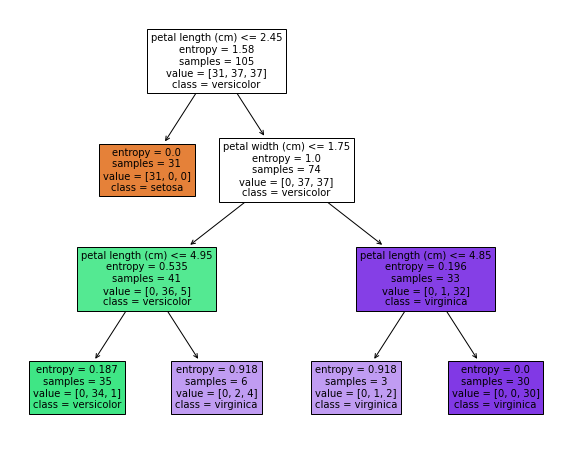

In [4]:
# 在iris数据集上训练C4.5
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树模型，模拟 C4.5
c45_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=5, min_samples_leaf=3)
c45_model.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(10, 8))
tree.plot_tree(c45_model, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

### 非矩形决策边界问题

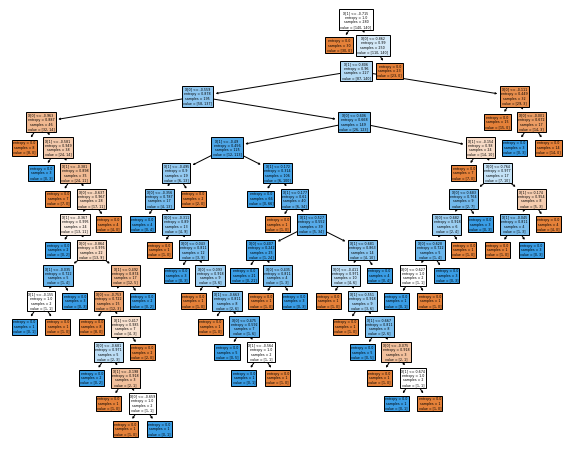

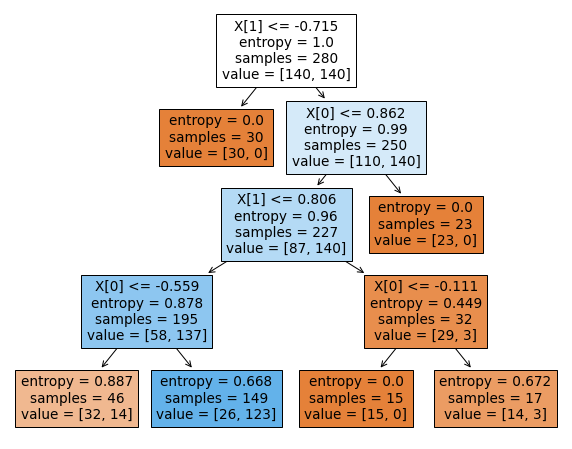

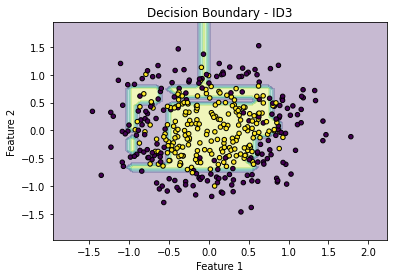

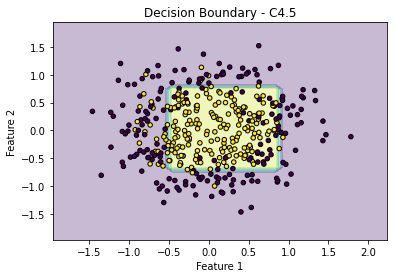

In [7]:
# 非矩形决策边界问题
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# 生成具有非矩形决策边界的数据集（同心圆）
X, y = make_circles(n_samples=400, noise=0.25, factor=0.5, random_state=42)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建决策树模型，模拟 ID3
id3_model = DecisionTreeClassifier(criterion='entropy')
id3_model.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(10, 8))
tree.plot_tree(id3_model, filled=True)
plt.show()

# 创建决策树模型，模拟 C4.5
c45_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5, min_samples_leaf=3)
c45_model.fit(X_train, y_train)

# 可视化决策树
plt.figure(figsize=(10, 8))
tree.plot_tree(c45_model, filled=True)
plt.show()

# 绘制决策边界函数
def plot_decision_boundary(tree, X, y, title):
    h = 0.1
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# 绘制 ID3 决策边界
plot_decision_boundary(id3_model, X, y, 'Decision Boundary - ID3')

# 绘制 C4.5 决策边界
plot_decision_boundary(c45_model, X, y, 'Decision Boundary - C4.5')

###  有不懂的都可以直接问AI，比99%的老师都要强